In [1]:
import xc_loss
from DeepsRSHXC import DeepsRSHXC
import torch
import torch.nn as nn
import torch.optim as optim


In [2]:
deepxc = DeepsRSHXC()
loss = xc_loss.loss()
mol2 = f'/Users/jiaoyuan/Documents/GitHub/ADOPTXC/module/net.mol2'
xcf= deepxc.forward(mol2)
print(xcf)
loss_value = loss.forward(xcf,mol2)


/opt/anaconda3/lib/python3.12/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  warnings.warn(out)


RSH(0.5194613337516785,0.4946155250072479,-0.49993014335632324) + LDA*0.08, LYP*0.81 + VWN*0.19


In [3]:
print(loss_value)

0.002804136992172978


converged SCF energy = -227.890743393718
Hamiltonian matrix dimension: (36, 36)

Full Fock matrix:
[[-1.10221533e+01 -2.97154318e+00  9.36576182e-04 ... -1.44155404e-04
  -1.23686176e-03 -6.75686558e-02]
 [-2.97154318e+00 -1.60055723e+00  7.72161932e-02 ... -4.65706210e-03
  -1.83358262e-02 -1.85498861e-01]
 [ 9.36576182e-04  7.72161932e-02 -3.83101942e-01 ...  8.08892676e-03
   2.05666149e-02  4.44832730e-02]
 ...
 [-1.44155404e-04 -4.65706210e-03  8.08892676e-03 ... -4.82891915e-01
  -6.80903802e-02 -1.55156429e-03]
 [-1.23686176e-03 -1.83358262e-02  2.05666149e-02 ... -6.80903802e-02
  -4.83874496e-01 -6.81812952e-02]
 [-6.75686558e-02 -1.85498861e-01  4.44832730e-02 ... -1.55156429e-03
  -6.81812952e-02 -4.83874496e-01]]


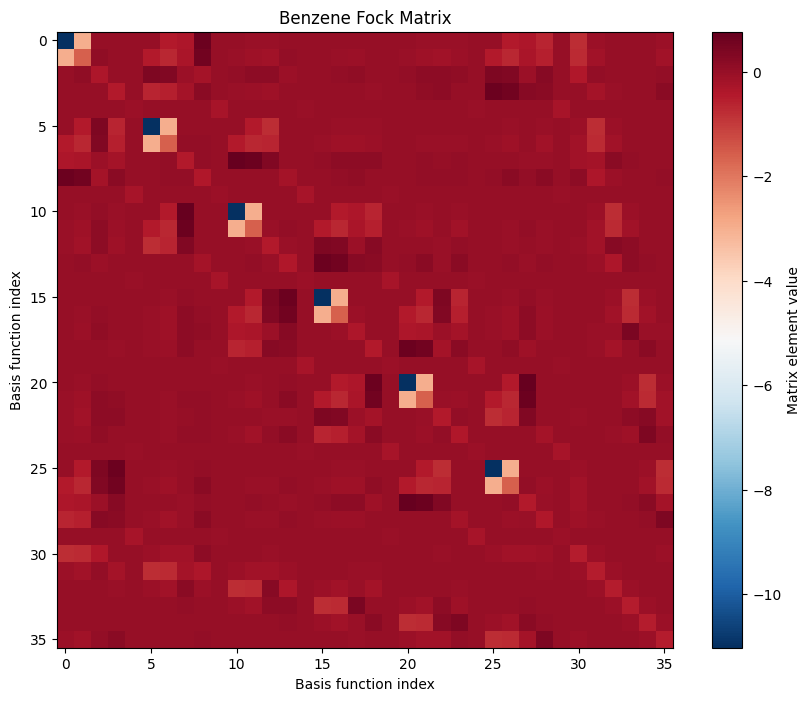


First carbon atom (C1) basis functions: 0-4
First hydrogen atom (H1) basis functions: 30-30

C1 atom Hamiltonian sub-block (5x5):
[[-1.10221533e+01 -2.97154318e+00  9.36576182e-04 -7.52931555e-17
   3.50155686e-17]
 [-2.97154318e+00 -1.60055723e+00  7.72161932e-02  6.21253746e-16
   4.24827962e-17]
 [ 9.36576182e-04  7.72161932e-02 -3.83101942e-01 -4.30776338e-16
  -2.25297288e-16]
 [-7.52931555e-17  6.21253746e-16 -4.30776338e-16 -4.72957955e-01
  -1.49049568e-16]
 [ 3.50155686e-17  4.24827962e-17 -2.25297288e-16 -1.49049568e-16
  -1.02815658e-01]]

C1-H1 interaction Hamiltonian sub-block (5x1):
[[-7.70574051e-01]
 [-7.46873931e-01]
 [-4.32036402e-01]
 [-1.73523176e-16]
 [-1.84077620e-16]]


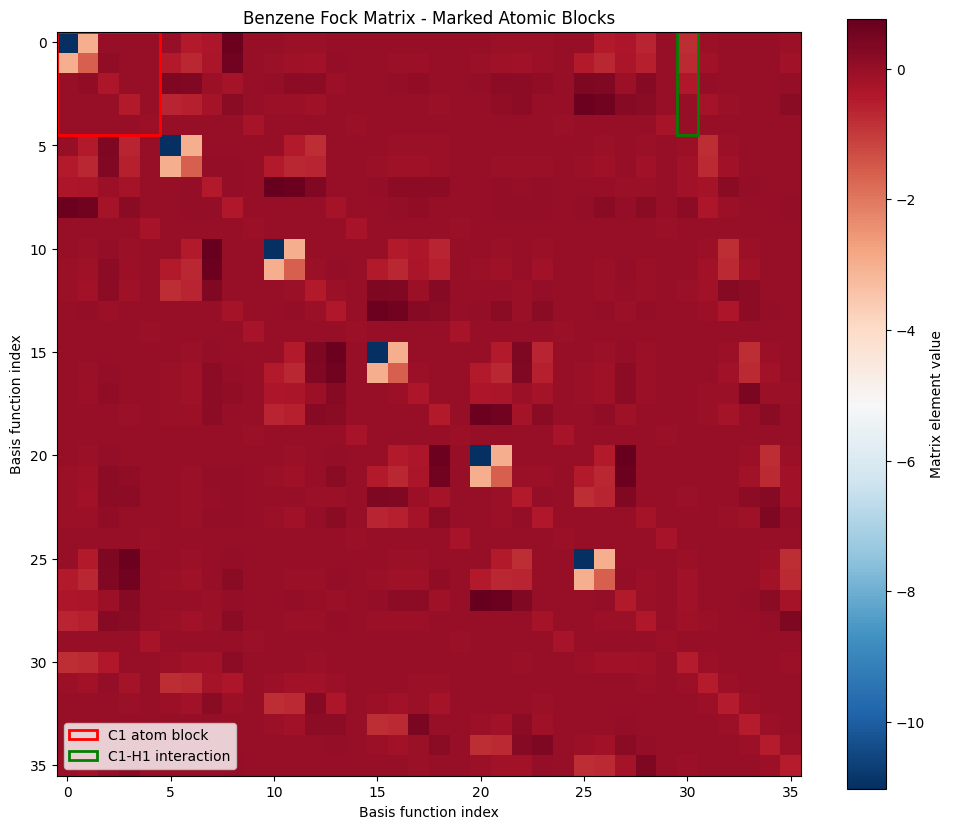


Basis function assignment for each atom:
Atom 0 (C): basis functions 0-4
Atom 1 (C): basis functions 5-9
Atom 2 (C): basis functions 10-14
Atom 3 (C): basis functions 15-19
Atom 4 (C): basis functions 20-24
Atom 5 (C): basis functions 25-29
Atom 6 (H): basis functions 30-30
Atom 7 (H): basis functions 31-31
Atom 8 (H): basis functions 32-32
Atom 9 (H): basis functions 33-33
Atom 10 (H): basis functions 34-34
Atom 11 (H): basis functions 35-35

Orbital energies (Hartree):
Orbital 0: energy = -11.0291, occupation = 2.0
Orbital 1: energy = -11.0291, occupation = 2.0
Orbital 2: energy = -11.0290, occupation = 2.0
Orbital 3: energy = -11.0287, occupation = 2.0
Orbital 4: energy = -11.0287, occupation = 2.0
Orbital 5: energy = -11.0286, occupation = 2.0
Orbital 6: energy = -1.0892, occupation = 2.0
Orbital 7: energy = -0.9546, occupation = 2.0
Orbital 8: energy = -0.9545, occupation = 2.0
Orbital 9: energy = -0.7673, occupation = 2.0
Orbital 10: energy = -0.7671, occupation = 2.0
Orbital 11

In [4]:
import numpy as np
from pyscf import gto, scf
import matplotlib.pyplot as plt

# Define benzene molecular structure (coordinates from the mol2 file)
mol = gto.Mole()
mol.atom = '''
C    1.3960    0.0000    0.0000
C    0.6980    1.2090    0.0000
C   -0.6980    1.2090    0.0000
C   -1.3960    0.0000    0.0000
C   -0.6980   -1.2090    0.0000
C    0.6980   -1.2090    0.0000
H    2.4790    0.0000    0.0000
H    1.2390    2.1460    0.0000
H   -1.2390    2.1460    0.0000
H   -2.4790    0.0000    0.0000
H   -1.2390   -2.1460    0.0000
H    1.2390   -2.1460    0.0000
'''
mol.basis = 'sto-3g'  # Use minimal basis set
mol.build()

# Perform Hartree-Fock calculation
mf = scf.RHF(mol)
mf.run()

# Get Hamiltonian matrix (Fock matrix)
fock_matrix = mf.get_fock()
h_core = mf.get_hcore()  # Core Hamiltonian

print("Hamiltonian matrix dimension:", fock_matrix.shape)
print("\nFull Fock matrix:")
print(fock_matrix)

# Visualize Hamiltonian matrix
plt.figure(figsize=(10, 8))
plt.imshow(fock_matrix, cmap='RdBu_r', interpolation='nearest')
plt.colorbar(label='Matrix element value')
plt.title('Benzene Fock Matrix')
plt.xlabel('Basis function index')
plt.ylabel('Basis function index')
plt.show()

# Analyze atomic block structure
# In STO-3G basis, each carbon atom has 5 basis functions, each hydrogen has 1
carbon_ao_size = 5  # C: 1s, 2s, 2px, 2py, 2pz
hydrogen_ao_size = 1  # H: 1s

# Mark the first carbon atom (atom 0) block
c1_start = 0
c1_end = carbon_ao_size

# Mark the first C-H bond (C1-H1) block
h1_start = 6 * carbon_ao_size  # First 6 carbon atoms
h1_end = h1_start + hydrogen_ao_size

print(f"\nFirst carbon atom (C1) basis functions: {c1_start}-{c1_end-1}")
print(f"First hydrogen atom (H1) basis functions: {h1_start}-{h1_end-1}")

# Extract C1 atom sub-block
c1_block = fock_matrix[c1_start:c1_end, c1_start:c1_end]
print(f"\nC1 atom Hamiltonian sub-block ({carbon_ao_size}x{carbon_ao_size}):")
print(c1_block)

# Extract C1-H1 interaction sub-block
c1_h1_block = fock_matrix[c1_start:c1_end, h1_start:h1_end]
print(f"\nC1-H1 interaction Hamiltonian sub-block ({carbon_ao_size}x{hydrogen_ao_size}):")
print(c1_h1_block)

# Visualize with marked blocks
plt.figure(figsize=(12, 10))
plt.imshow(fock_matrix, cmap='RdBu_r', interpolation='nearest')

# Mark C1 atom block
rect_c1 = plt.Rectangle((c1_start-0.5, c1_start-0.5), carbon_ao_size, carbon_ao_size, 
                       fill=False, edgecolor='red', linewidth=2, label='C1 atom block')
plt.gca().add_patch(rect_c1)

# Mark C1-H1 interaction block
rect_ch = plt.Rectangle((h1_start-0.5, c1_start-0.5), hydrogen_ao_size, carbon_ao_size, 
                       fill=False, edgecolor='green', linewidth=2, label='C1-H1 interaction')
plt.gca().add_patch(rect_ch)

plt.colorbar(label='Matrix element value')
plt.title('Benzene Fock Matrix - Marked Atomic Blocks')
plt.xlabel('Basis function index')
plt.ylabel('Basis function index')
plt.legend()
plt.show()

# More detailed analysis: print basis function ranges for each atom
print("\nBasis function assignment for each atom:")
for i in range(mol.natm):
    atom_name = mol.atom_symbol(i)
    start_idx = mol.search_ao_label(f"{i} {atom_name}")
    print(f"Atom {i} ({atom_name}): basis functions {start_idx[0]}-{start_idx[-1]}")

# Calculate orbital energies and occupations
mo_energy = mf.mo_energy
mo_occ = mf.mo_occ

print(f"\nOrbital energies (Hartree):")
for i, energy in enumerate(mo_energy[:12]):  # Show only first 12 orbitals
    occ = mo_occ[i]
    print(f"Orbital {i}: energy = {energy:.4f}, occupation = {occ}")

# Additional analysis: show the pattern of significant matrix elements
print("\nAnalysis of matrix element patterns:")
print("Diagonal elements represent orbital energies")
print("Large off-diagonal elements indicate strong orbital interactions")
print("Small values indicate weak coupling between orbitals")

converged SCF energy = -227.890743393718


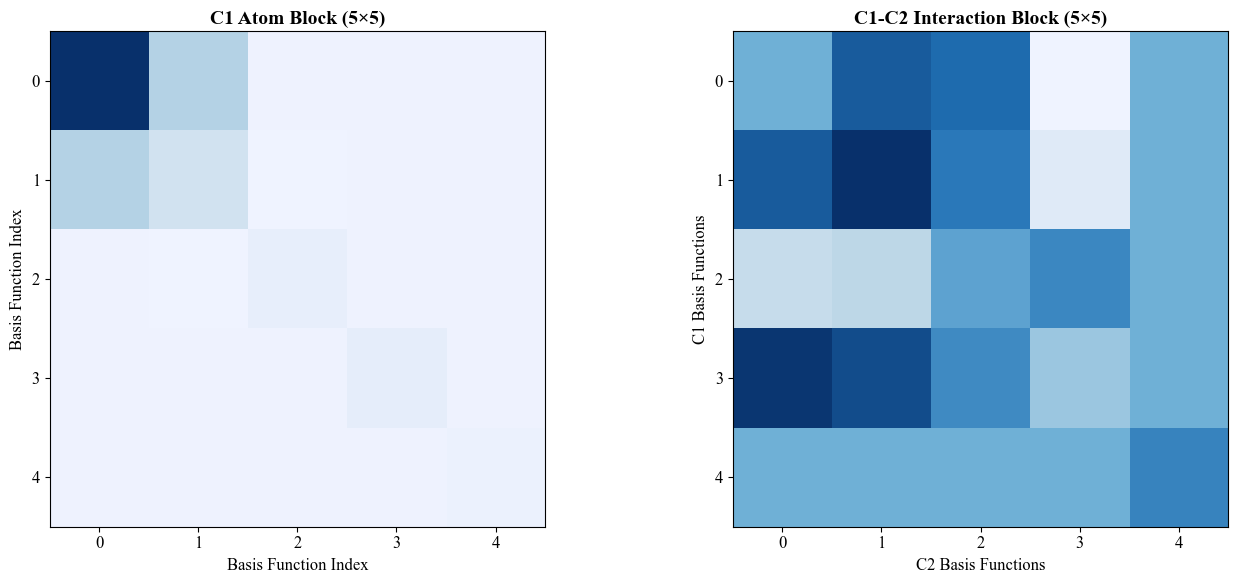

C1 ATOM BLOCK ANALYSIS
Matrix shape: (5, 5)
Basis functions: 1s, 2s, 2px, 2py, 2pz

Matrix values:
[[-1.10221533e+01 -2.97154318e+00  9.36576182e-04 -7.52931555e-17
   3.50155686e-17]
 [-2.97154318e+00 -1.60055723e+00  7.72161932e-02  6.21253746e-16
   4.24827962e-17]
 [ 9.36576182e-04  7.72161932e-02 -3.83101942e-01 -4.30776338e-16
  -2.25297288e-16]
 [-7.52931555e-17  6.21253746e-16 -4.30776338e-16 -4.72957955e-01
  -1.49049568e-16]
 [ 3.50155686e-17  4.24827962e-17 -2.25297288e-16 -1.49049568e-16
  -1.02815658e-01]]

C1-C2 INTERACTION BLOCK ANALYSIS
Matrix shape: (5, 5)
This block represents the interaction between C1 and C2 orbitals

Matrix values:
[[-1.95268505e-04 -4.62936473e-01 -3.81994334e-01  6.61609337e-01
  -1.10395645e-17]
 [-4.62937584e-01 -6.94489182e-01 -3.08044349e-01  5.53497046e-01
   3.45387117e-17]
 [ 3.81960126e-01  3.25324189e-01 -7.91031353e-02 -2.32331470e-01
  -1.79548559e-16]
 [-6.61630863e-01 -5.43545090e-01 -2.16005161e-01  1.79730403e-01
  -9.98450410e-17]

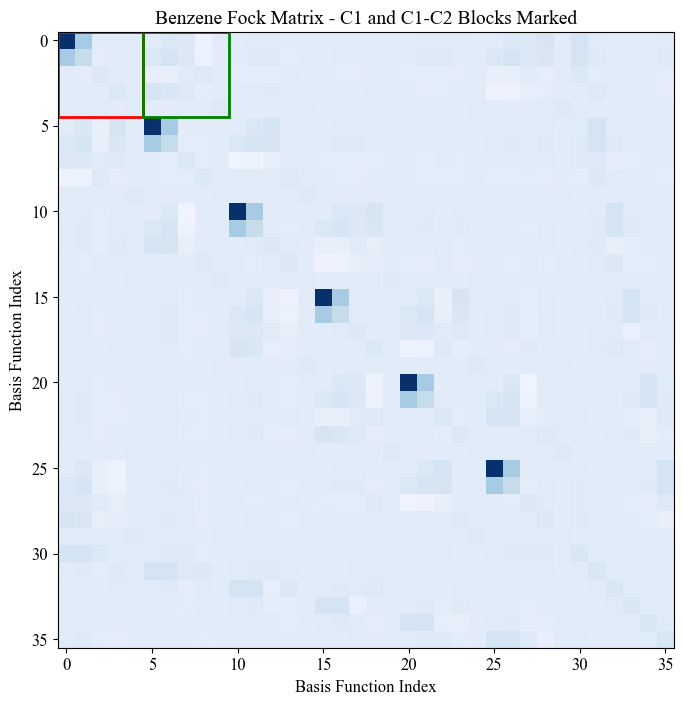

In [13]:
import numpy as np
from pyscf import gto, scf
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Set global font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

# Define benzene molecular structure
mol = gto.Mole()
mol.atom = '''
C    1.3960    0.0000    0.0000
C    0.6980    1.2090    0.0000
C   -0.6980    1.2090    0.0000
C   -1.3960    0.0000    0.0000
C   -0.6980   -1.2090    0.0000
C    0.6980   -1.2090    0.0000
H    2.4790    0.0000    0.0000
H    1.2390    2.1460    0.0000
H   -1.2390    2.1460    0.0000
H   -2.4790    0.0000    0.0000
H   -1.2390   -2.1460    0.0000
H    1.2390   -2.1460    0.0000
'''
mol.basis = 'sto-3g'
mol.build()

# Perform Hartree-Fock calculation
mf = scf.RHF(mol)
mf.run()

# Get Hamiltonian matrix
fock_matrix = mf.get_fock()

# Define basis function sizes
carbon_ao_size = 5  # C: 1s, 2s, 2px, 2py, 2pz

# Extract the two blocks of interest
c1_start = 0
c1_end = carbon_ao_size
c2_start = carbon_ao_size  # Second carbon atom
c2_end = c2_start + carbon_ao_size

# C1 atom block (5x5 matrix)
c1_block = fock_matrix[c1_start:c1_end, c1_start:c1_end]

# C1-C2 interaction block (5x5 matrix)
c1_c2_block = fock_matrix[c1_start:c1_end, c2_start:c2_end]

# Create a custom blue colormap
colors = ['#08306b', '#2171b5', '#6baed6', '#bdd7e7', '#eff3ff']  # Dark to light blue
cmap_blue = mcolors.LinearSegmentedColormap.from_list('blue_scale', colors)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot C1 atom block
im1 = ax1.imshow(c1_block, cmap=cmap_blue, interpolation='nearest')
ax1.set_title('C1 Atom Block (5×5)', fontsize=14, fontweight='bold', fontname='Times New Roman')
ax1.set_xlabel('Basis Function Index', fontsize=12, fontname='Times New Roman')
ax1.set_ylabel('Basis Function Index', fontsize=12, fontname='Times New Roman')

# Add colorbar for C1 block


# Plot C1-C2 interaction block
im2 = ax2.imshow(c1_c2_block, cmap=cmap_blue, interpolation='nearest')
ax2.set_title('C1-C2 Interaction Block (5×5)', fontsize=14, fontweight='bold', fontname='Times New Roman')
ax2.set_xlabel('C2 Basis Functions', fontsize=12, fontname='Times New Roman')
ax2.set_ylabel('C1 Basis Functions', fontsize=12, fontname='Times New Roman')


# Add colorbar for C1-C2 block



plt.tight_layout()
plt.show()

# Print detailed information about the blocks
print("C1 ATOM BLOCK ANALYSIS")
print("=" * 50)
print(f"Matrix shape: {c1_block.shape}")
print(f"Basis functions: 1s, 2s, 2px, 2py, 2pz")
print("\nMatrix values:")
print(c1_block)

print("\nC1-C2 INTERACTION BLOCK ANALYSIS")
print("=" * 50)
print(f"Matrix shape: {c1_c2_block.shape}")
print("This block represents the interaction between C1 and C2 orbitals")
print("\nMatrix values:")
print(c1_c2_block)

# Additional analysis: orbital contributions
print("\nORBITAL CONTRIBUTION ANALYSIS")
print("=" * 50)
print("For C1 atom block:")
print("Diagonal elements represent orbital energies:")
orbital_labels = ['1s', '2s', '2px', '2py', '2pz']
for i, label in enumerate(orbital_labels):
    print(f"  {label}: {c1_block[i,i]:.4f} Hartree")

print("\nFor C1-C2 interaction block:")
print("These values represent coupling strengths between C1 and C2 orbitals:")
print("Note: Strongest interactions typically between orbitals of similar symmetry")
# Show the full Fock matrix with the marked blocks
plt.figure(figsize=(10, 8))
plt.imshow(fock_matrix, cmap=cmap_blue, interpolation='nearest')

# Mark C1 atom block
rect_c1 = plt.Rectangle((c1_start-0.5, c1_start-0.5), carbon_ao_size, carbon_ao_size, 
                       fill=False, edgecolor='red', linewidth=2, label='C1 atom block')
plt.gca().add_patch(rect_c1)

# Mark C1-C2 interaction block
rect_c1_c2 = plt.Rectangle((c2_start-0.5, c1_start-0.5), carbon_ao_size, carbon_ao_size, 
                       fill=False, edgecolor='green', linewidth=2, label='C1-C2 interaction')
plt.gca().add_patch(rect_c1_c2)

plt.title('Benzene Fock Matrix - C1 and C1-C2 Blocks Marked', fontsize=14, fontname='Times New Roman')
plt.xlabel('Basis Function Index', fontsize=12, fontname='Times New Roman')
plt.ylabel('Basis Function Index', fontsize=12, fontname='Times New Roman')
plt.show()